## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [178]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [179]:
df = pd.read_csv(r'C:\Users\sanju\Downloads\Predicting-Student-Performance-Using-Machine-Learning-main (1)\Predicting-Student-Performance-Using-Machine-Learning-main\stud_updated.csv')

#### Show Top 5 Records

In [180]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,overall,reading_score,writing_score,study_time,screen_time,health,going_out_with_friends,absences,failure,science_score,activities,romantic,travel_time,math_score
0,female,group B,bachelor's degree,standard,none,72,72,74,4,3,Average,Rarely,2,0,95,Participates,No,>60 min,78.25
1,female,group C,some college,standard,completed,69,90,88,3,4,Average,Sometimes,18,1,65,Doesn't Participate,Yes,>60 min,78.00
2,female,group B,master's degree,standard,none,90,95,93,1,6,Average,Never,2,1,18,Doesn't Participate,No,<15 min,74.00
3,male,group A,associate's degree,free/reduced,none,47,57,44,9,3,Excellent,Often,8,1,52,Doesn't Participate,Yes,>60 min,50.00
4,male,group C,some college,standard,none,76,78,75,7,3,Poor,Rarely,7,0,57,Doesn't Participate,Yes,15-30 min,71.50


#### Preparing X and Y variables

In [181]:
X = df.drop(columns=['overall'],axis=1)

In [182]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,study_time,screen_time,health,going_out_with_friends,absences,failure,science_score,activities,romantic,travel_time,math_score
0,female,group B,bachelor's degree,standard,none,72,74,4,3,Average,Rarely,2,0,95,Participates,No,>60 min,78.25
1,female,group C,some college,standard,completed,90,88,3,4,Average,Sometimes,18,1,65,Doesn't Participate,Yes,>60 min,78.00
2,female,group B,master's degree,standard,none,95,93,1,6,Average,Never,2,1,18,Doesn't Participate,No,<15 min,74.00
3,male,group A,associate's degree,free/reduced,none,57,44,9,3,Excellent,Often,8,1,52,Doesn't Participate,Yes,>60 min,50.00
4,male,group C,some college,standard,none,78,75,7,3,Poor,Rarely,7,0,57,Doesn't Participate,Yes,15-30 min,71.50


In [183]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

print("Categories in 'health' variable:     ",end=" " )
print(df['health'].unique())

print("Categories in 'going_out_with_friends' variable:     ",end=" " )
print(df['going_out_with_friends'].unique())

print("Categories in 'activities' variable:     ",end=" " )
print(df['activities'].unique())

print("Categories in 'romantic' variable:     ",end=" " )
print(df['romantic'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']
Categories in 'health' variable:      ['Average' 'Excellent' 'Poor' 'Good']
Categories in 'going_out_with_friends' variable:      ['Rarely' 'Sometimes' 'Never' 'Often']
Categories in 'activities' variable:      ['Participates' "Doesn't Participate"]
Categories in 'romantic' variable:      ['No' 'Yes']


In [184]:
y = df['overall']

In [185]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: overall, Length: 1000, dtype: int64

In [186]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assume `df` is your dataset
X = df.drop(columns=["overall"])
y = df["overall"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features (using Pandas DataFrame)
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Define the transformers
numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder(drop="first", sparse_output=False)  # Corrected argument name

# Create the column transformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

# Fit the transformer on the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Create the DataFrame with proper column names
# Since X_train is now a NumPy array, we can't use `select_dtypes`, so we handle column names manually

# Get the column names from the OneHotEncoder
one_hot_transformer.fit(X_train[cat_features])  # Explicitly fitting the one-hot transformer
columns = list(one_hot_transformer.get_feature_names_out(cat_features)) + num_features.tolist()

# Create a DataFrame from the transformed data
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns)

# Display the transformed DataFrame
print(X_train_transformed_df.head())


   gender_male  race_ethnicity_group B  race_ethnicity_group C  \
0          0.0                     0.0                     0.0   
1          0.0                     0.0                     1.0   
2          0.0                     0.0                     0.0   
3          1.0                     0.0                     1.0   
4          1.0                     0.0                     0.0   

   race_ethnicity_group D  race_ethnicity_group E  \
0                     1.0                     0.0   
1                     0.0                     0.0   
2                     1.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     1.0   

   parental_level_of_education_bachelor's degree  \
0                                            0.0   
1                                            1.0   
2                                            0.0   
3                                            0.0   
4                       

In [187]:
X = preprocessor.fit_transform(X)

In [188]:
X.shape  


(1000, 31)

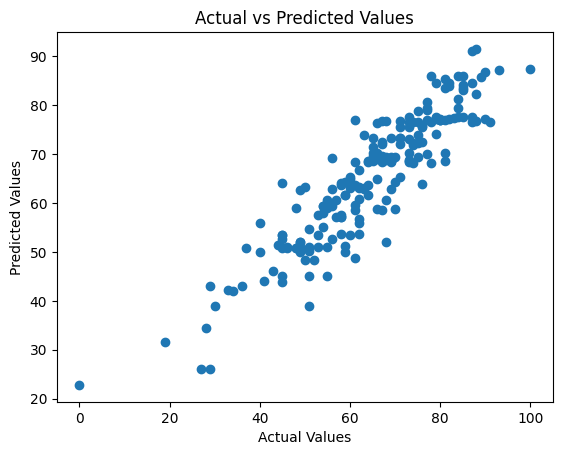

In [189]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


#### Create an Evaluate Function to give all metrics after model Training

In [190]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

print("R² for Test Data:", model_test_r2)
print("RMSE for Test Data:", model_test_rmse)


R² for Test Data: 0.8272903044402982
RMSE for Test Data: 6.48281582200088


In [197]:
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Lasso
Model performance for Training set
- Root Mean Squared Error: 5.1907
- Mean Absolute Error: 4.1046
- R2 Score: 0.8805
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1794
- Mean Absolute Error: 4.1450
- R2 Score: 0.8898


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.8287
- Mean Absolute Error: 0.6627
- R2 Score: 0.9970
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8403
- Mean Absolute Error: 0.6570
- R2 Score: 0.9971


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.8099
- Mean Absolute Error: 5.3312
- R2 Score: 0.7943
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3945
- Mean Absolute Error: 6.7460
- R2 Score: 0.7104


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
---------------------------

### Results

In [198]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.997099
0,Lasso,0.889758
5,XGBRegressor,0.889303
4,Random Forest Regressor,0.867700
6,AdaBoost Regressor,0.862712
3,Decision Tree,0.738389
2,K-Neighbors Regressor,0.710410


## Lasso Regression

In [199]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso model
lasso_model = Lasso(fit_intercept=True)

# Fit the model
lasso_model = lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Calculate R² score
score_lasso = r2_score(y_test, y_pred_lasso) * 100

# Print the accuracy
print("Accuracy of the Lasso model is %.2f" % score_lasso)


Accuracy of the Lasso model is 88.98


## Plot y_pred and y_test

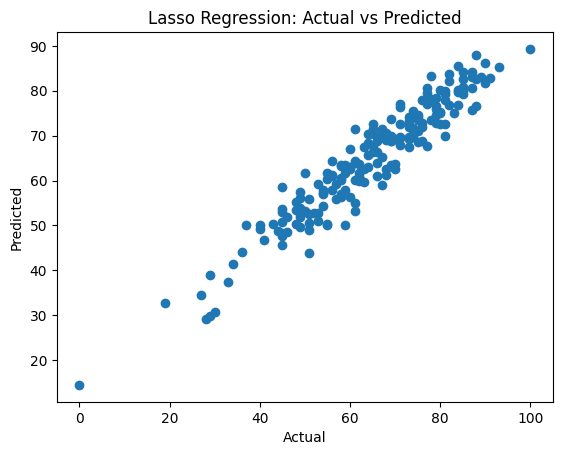

In [200]:
import matplotlib.pyplot as plt

# Make predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Plotting Actual vs Predicted values
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()


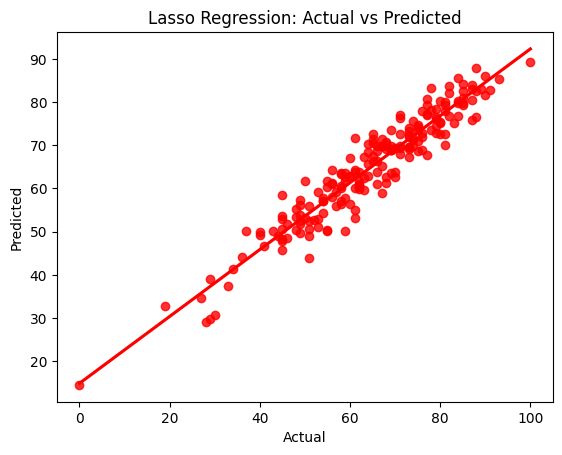

In [201]:
import seaborn as sns

# Make predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Plot using Seaborn's regplot
sns.regplot(x=y_test, y=y_pred_lasso, ci=None, color='red')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()


#### Difference between Actual and Predicted Values

In [202]:

# Make predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Create the DataFrame for actual, predicted, and difference (residuals)
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_lasso, 'Difference': y_test - y_pred_lasso})

# Display the DataFrame
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91        82.831112    8.168888
737            53        59.189856   -6.189856
740            80        75.319548    4.680452
660            74        75.598935   -1.598935
411            84        80.211510    3.788490
..            ...              ...         ...
408            52        52.731378   -0.731378
332            62        59.793534    2.206466
208            74        71.601322    2.398678
613            65        67.617089   -2.617089
78             61        64.348166   -3.348166

[200 rows x 3 columns]
